<a href="https://colab.research.google.com/github/pazcalll/PCVK_Genap_2021/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

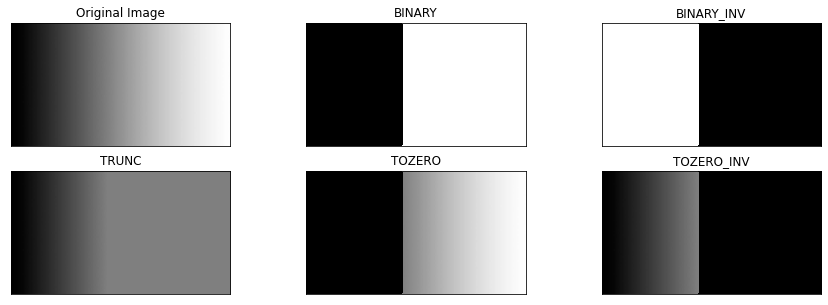

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1), plt.imshow(images[i], cmap='gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in float_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in float_scalars


109


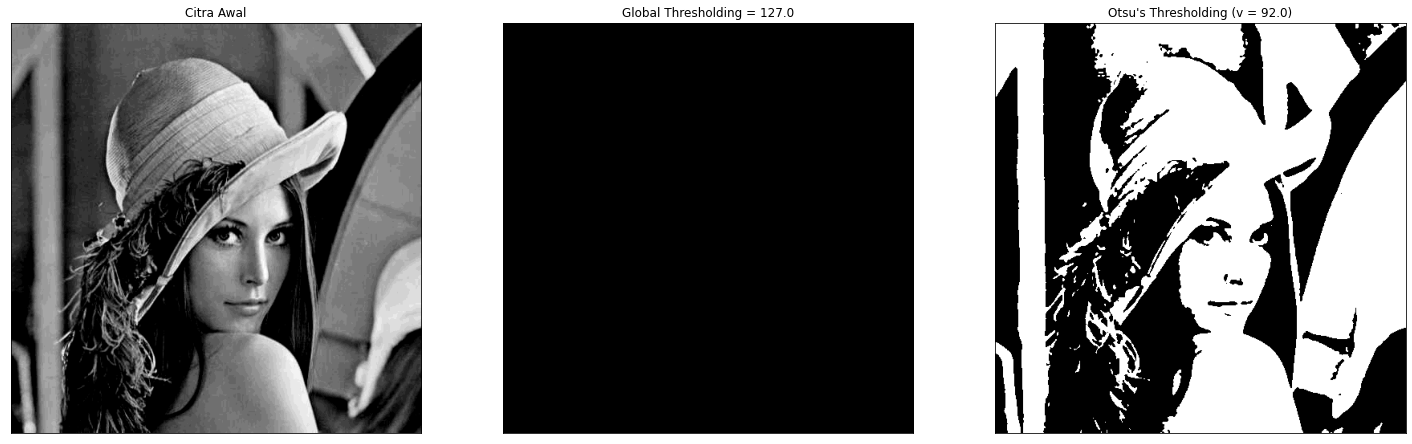

In [ ]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_gs_lc2.jpg',0)
# image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_gray = image

blur = cv.GaussianBlur(image,(5,5),0)
histo = cv.calcHist([blur], [0], None, [255], [0, 255])
# cv2_imshow(image_gray)
threshold=127
# (ret, th1) = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
# cv2_imshow(blur)
within=[]
for i in range(len(histo)):
  x,y = np.split(histo, [i])
  x1 = np.sum(x)/(blur.shape[0]*blur.shape[1])  # weight of class 1
  y1 = np.sum(y)/(blur.shape[0]*blur.shape[1])
  x2 = np.sum([j*t for j,t in enumerate(x)])/np.sum(x)
  y2 = np.sum([j*t for j,t in enumerate(y)])/np.sum(y)
  x3 = np.sum([(j-x2)**2*t for j, t in enumerate(x)])/np.sum(x)
  x3 = np.nan_to_num(x3)

  y3 = np.sum([(j-y2)**2*t for j, t in enumerate(y)])/np.sum(y)

  within.append(x1*x3 + y1*y3)
m = np.argmin(within)
print(m)
(thresh1, Bin1) = cv.threshold(blur,threshold, 255, cv.THRESH_BINARY)
(thresh2, Bin2) = cv.threshold(blur, m, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
# cv2_imshow(Bin)
plt.figure(figsize = (25,10))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(Bin1,cmap = 'gray')
plt.title('Global Thresholding = '+str(thresh1)), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(Bin2,cmap = 'gray')
plt.title(("Otsu's Thresholding (v = ")+str(thresh2)+")"), plt.xticks([]), plt.yticks([])
plt.show()

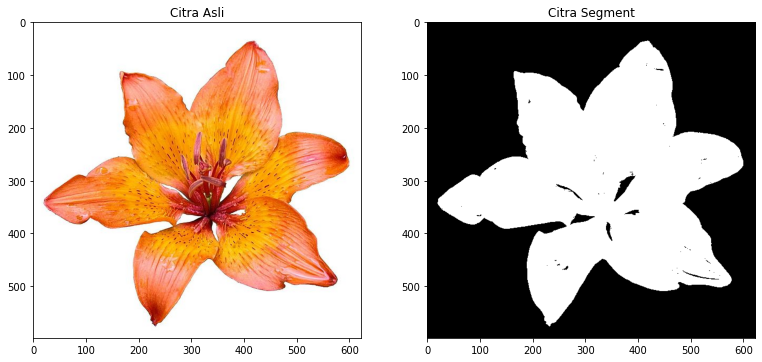

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

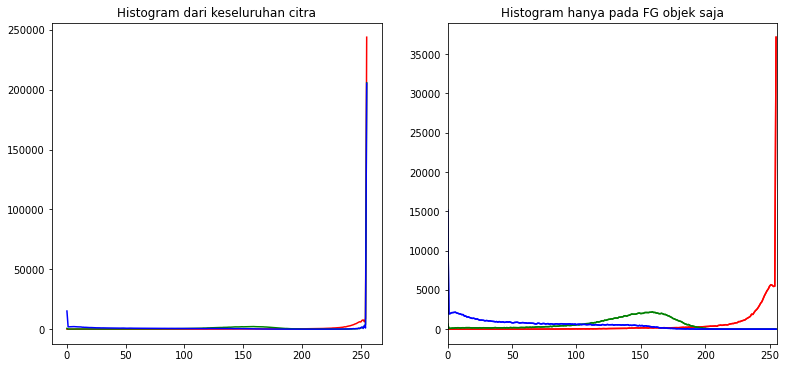

In [79]:
img_lily = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')
# img = cv.imread('lego.png')
img_lily_rgb = cv.cvtColor(img_lily, cv.COLOR_BGR2RGB) 
gray = cv.cvtColor(img_lily_rgb, cv.COLOR_BGR2GRAY)

ret, thresh = cv.threshold(gray, 200, 255, cv.THRESH_BINARY_INV)
plt.figure(figsize=(20,10))
plt.subplot(131), plt.imshow(img_lily_rgb)
plt.title('Citra Asli')
plt.subplot(132), plt.imshow(thresh, 'gray')
plt.title('Citra Segment')
plt.show()

color = ('r','g','b')
plt.figure(figsize=(13,13))

for i,col in enumerate(color):
    hist0 = cv.calcHist([img_lily_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_lily_rgb],[i],thresh,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_lily_rgb],[i],thresh,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

# cv.waitKey(0)


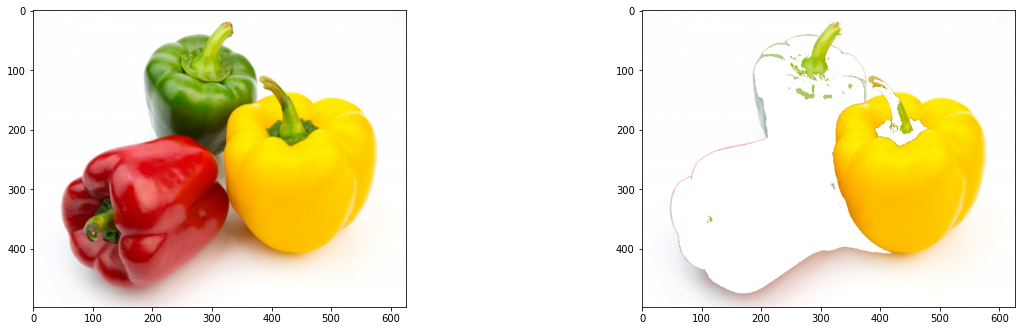

In [78]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/peppers.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
we will use the function cv.kmeans () that asks array 2D as input, while
the image of the original is an array of 3D
Next we need to flatten the input image array
'''
#reshape array to 2D form
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
'''
The condition for stopping Dr. KMeans' iteration is if the centroid has not
shiftedtoo much position between current interaction with the previous iter
ation (convergent). Because the amount of data that is great, we will stop
iterating when the number of iterations = 100 or epsilon (the difference
between the position of the centroid skrg with the position of the centroid
in the iteration before) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
If you look at the original image , there are 3 main colors (green, blue,
and white / orange). for this experiment we will use 3 clusters for this
image
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
# #Convert centroid point to an integer
# centers = np.uint8(centers)
# #flattening label array
labels = labels.flatten()
# #konversi warna pixel asli kewarna dari tiap centroidnya
# segmented_image = centers[labels.flatten()]
# # Reshape to the original image
# segmented_image = segmented_image.reshape(img.shape)
# plt.figure(figsize = (20,20))
# plt.subplot(1,2,1),plt.imshow(img)
# plt.subplot(1,2,2),plt.imshow(segmented_image)

# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 0
masked_image[labels == cluster] = [255, 255, 255]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image)
plt.show()

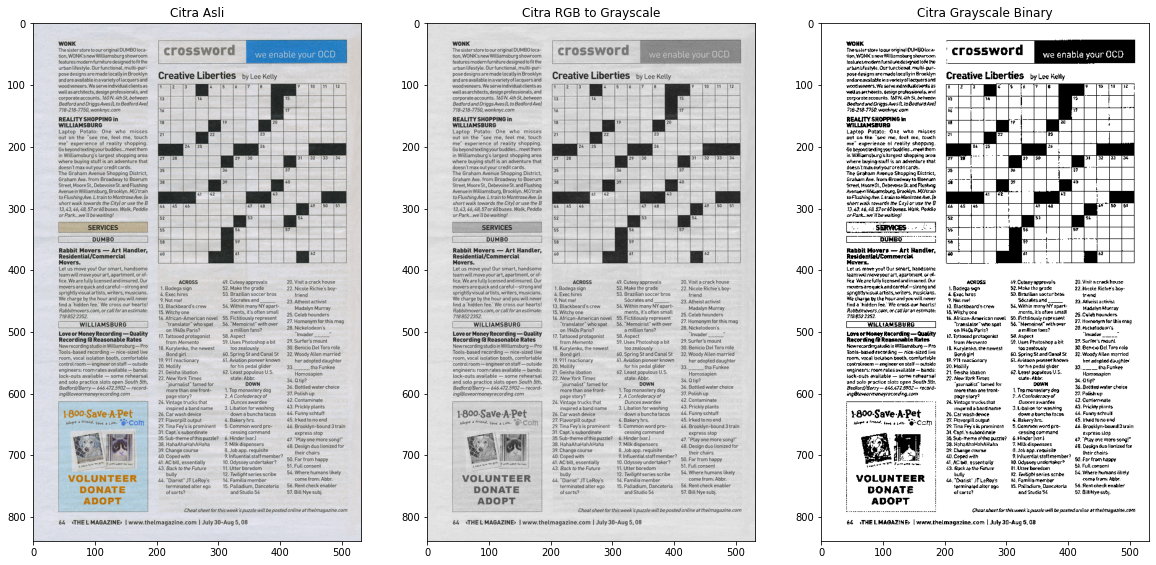

In [133]:
file=('/content/drive/MyDrive/PCVK/Images/crossword.jpg')
crossword=cv.imread(file)
crossword_rgb=cv.cvtColor(crossword, cv.COLOR_BGR2RGB)
crossword_gray=cv.cvtColor(crossword_rgb, cv.COLOR_RGB2GRAY)
ret, thresh =cv.threshold(crossword_gray, 159, 255, cv.THRESH_BINARY)
plt.figure(figsize=(20,30))
plt.subplot(131), plt.imshow(crossword)
plt.title('Citra Asli')
plt.subplot(132), plt.imshow(crossword_gray,'gray')
plt.title('Citra RGB to Grayscale')
plt.subplot(133), plt.imshow(thresh,'gray')
plt.title('Citra Grayscale Binary')
plt.show()